AULA: Análise do mercado de crédito com R e Python<br>
AUTOR: Fernando da Silva/Cientista de dados<br>
INFORMAÇÕES: saiba mais sobre o tema nas referências abaixo<br>
F. J. C. Carvalho, F. E. P. Souza, J. Sicsu, L. F. R. Paula, and R. Studart.
Economia Monetária e Financeira - Teoria e Política. Elsevier, Rio de Janeiro, sétima edition, 2000.<br>
A. A. Neto. Mercado Financeiro. Editora Atlas, 2012.

# Bibliotecas e Softwares

In [4]:
# Instala statsmodels mais atual
!pip install statsmodels==0.13.5

# Baixa e descompacta o X13-ARIMA-SEATS (Linux)
# Docs: https://www.census.gov/data/software/x13as.X-13ARIMA-SEATS.html
!wget https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/program-archives/x13as_ascii-v1-1-b59.tar.gz
!tar --gunzip --extract --verbose --file=x13as_ascii-v1-1-b59.tar.gz

# Instala outras bibliotecas python
!pip install sidrapy
!pip install python-bcb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 1.1 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 80 kB 7.9 MB/s 


In [5]:
# Importa módulos
import pandas as pd
import sidrapy as sidra
from bcb import sgs
from statsmodels.tsa import x13
import os

# Coleta de dados

In [6]:
# Parâmetros e códigos para coleta de dados
codigos = {
  # Concessões de crédito - Total - R$ (milhões)
  "Concessões de crédito - Total": 20631,

  # Concessões de crédito - Pessoas jurídicas - Total - R$ (milhões)
  "Concessões de crédito - PJ": 20632,

  # Concessões de crédito - Pessoas físicas - Total	- R$ (milhões)
  "Concessões de crédito - PF": 20633,

  # Concessões de crédito com recursos livres - Total	- R$ (milhões)
  "Concessões de crédito - Livre": 20634,

  # Concessões de crédito com recursos direcionados - Total	- R$ (milhões)
  "Concessões de crédito - Direcionado": 20685,

  # Saldo da carteira de crédito - Total - R$ (milhões)
  "Saldo da carteira de crédito - Total": 20539,

  # PIB acumulado dos últimos 12 meses - Valores correntes - (R$ milhões)
  "PIB acumulado dos últimos 12 meses": 4382,

  # Saldos das operações de crédito sob controle privado - Total	- (R$ milhões)
  "Saldos de crédito - Privado": 2043,

  # Saldos das operações de crédito sob controle público - Total	- (R$ milhões)
  "Saldos de crédito - Público": 2007,

  # Taxa média de juros das operações de crédito - Total - % a.a.
  "Taxa média de juros das operações de crédito": 20714,

  # Spread médio das operações de crédito - Total	- p.p.
  "Spread médio das operações de crédito": 20783,

  # Inadimplência da carteira de crédito - Total - %
  "Inadimplência da carteira de crédito": 21082

}

# Importa dados do SGS/BCB
dados = sgs.get(codes = codigos, start = "2012-01-01")
dados

,Concessões de crédito - Total,Concessões de crédito - PJ,Concessões de crédito - PF,Concessões de crédito - Livre,Concessões de crédito - Direcionado,Saldo da carteira de crédito - Total,PIB acumulado dos últimos 12 meses,Saldos de crédito - Privado,Saldos de crédito - Público,Taxa média de juros das operações de crédito,Spread médio das operações de crédito,Inadimplência da carteira de crédito
Date,,,,,,,,,,,,
2012-01-01,214365,116230,98134,192708,21656,2033185,4412981.7,1144812,888373,26.80,18.22,3.66
2012-02-01,204149,111611,92539,182427,21723,2041040,4448184.4,1146273,894768,26.86,18.63,3.71
2012-03-01,241689,139145,102544,215826,25863,2078912,4489325.4,1163169,915743,26.54,18.41,3.67
2012-04-01,232678,131809,100869,207523,25155,2106585,4520587.5,1172206,934379,25.96,18.21,3.76
2012-05-01,255850,145295,110556,226037,29814,2142061,4554177.1,1183595,958466,24.36,16.96,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,503925,232433,271492,454728,49198,4875904,9032367.6,2810002,2065902,27.54,17.18,2.73
2022-06-01,504643,235934,268709,445616,59026,4956545,9126147.8,2854712,2101833,28.03,17.62,2.66
2022-07-01,488923,215777,273147,423538,65385,4992362,9226694.8,2867952,2124410,29.38,18.52,2.78


In [7]:
# Importa dados do IPCA
ipca = sidra.get_table(
    table_code = "1737", 
    territorial_level = "1", 
    ibge_territorial_code = "all", 
    variable = "2266", 
    period = "all"
    )
ipca

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,30,Número-índice,0.0000000076183,1,Brasil,197912,dezembro 1979,2266,IPCA - Número-índice (base: dezembro de 1993 =...
2,1,Brasil,30,Número-índice,0.0000000081223,1,Brasil,198001,janeiro 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
3,1,Brasil,30,Número-índice,0.0000000084973,1,Brasil,198002,fevereiro 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
4,1,Brasil,30,Número-índice,0.0000000090104,1,Brasil,198003,março 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
...,...,...,...,...,...,...,...,...,...,...,...
511,1,Brasil,30,Número-índice,6455.8500000000000,1,Brasil,202206,junho 2022,2266,IPCA - Número-índice (base: dezembro de 1993 =...
512,1,Brasil,30,Número-índice,6411.9500000000000,1,Brasil,202207,julho 2022,2266,IPCA - Número-índice (base: dezembro de 1993 =...
513,1,Brasil,30,Número-índice,6388.8700000000000,1,Brasil,202208,agosto 2022,2266,IPCA - Número-índice (base: dezembro de 1993 =...
514,1,Brasil,30,Número-índice,6370.3400000000000,1,Brasil,202209,setembro 2022,2266,IPCA - Número-índice (base: dezembro de 1993 =...


# Tratamento de dados

In [12]:
ipca

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável
1,1,Brasil,30,Número-índice,0.0000000076183,1,Brasil,197912,dezembro 1979,2266,IPCA - Número-índice (base: dezembro de 1993 =...
2,1,Brasil,30,Número-índice,0.0000000081223,1,Brasil,198001,janeiro 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
3,1,Brasil,30,Número-índice,0.0000000084973,1,Brasil,198002,fevereiro 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
4,1,Brasil,30,Número-índice,0.0000000090104,1,Brasil,198003,março 1980,2266,IPCA - Número-índice (base: dezembro de 1993 =...
...,...,...,...,...,...,...,...,...,...,...,...
511,1,Brasil,30,Número-índice,6455.8500000000000,1,Brasil,202206,junho 2022,2266,IPCA - Número-índice (base: dezembro de 1993 =...
512,1,Brasil,30,Número-índice,6411.9500000000000,1,Brasil,202207,julho 2022,2266,IPCA - Número-índice (base: dezembro de 1993 =...
513,1,Brasil,30,Número-índice,6388.8700000000000,1,Brasil,202208,agosto 2022,2266,IPCA - Número-índice (base: dezembro de 1993 =...
514,1,Brasil,30,Número-índice,6370.3400000000000,1,Brasil,202209,setembro 2022,2266,IPCA - Número-índice (base: dezembro de 1993 =...


In [13]:
# Trata dados do SGS
dados.rename_axis("data", inplace = True)

# Trata dados do IPCA
ipca = (
    ipca
    .rename(columns = ipca.iloc[0])
    .rename(columns = {"Mês (Código)": "data", "Valor": "ipca"})
    .query("ipca not in 'Valor'")
    .filter(items = ["data", "ipca"], axis = "columns")
    .assign(
        data = lambda x: pd.to_datetime(x.data, format = "%Y%m"),
        ipca = lambda y: y.ipca.astype(float)
        )
    .set_index("data")
)
ipca

,ipca
data,
1979-12-01,7.618300e-09
1980-01-01,8.122300e-09
1980-02-01,8.497300e-09
1980-03-01,9.010400e-09
1980-04-01,9.486700e-09
...,...
2022-06-01,6.455850e+03
2022-07-01,6.411950e+03
2022-08-01,6.388870e+03


# Visualização de dados

In [14]:
# Objeto com fonte dos dados
fonte = "Dados: BCB | Elaboração: analisemacro.com.br"

### Concessões

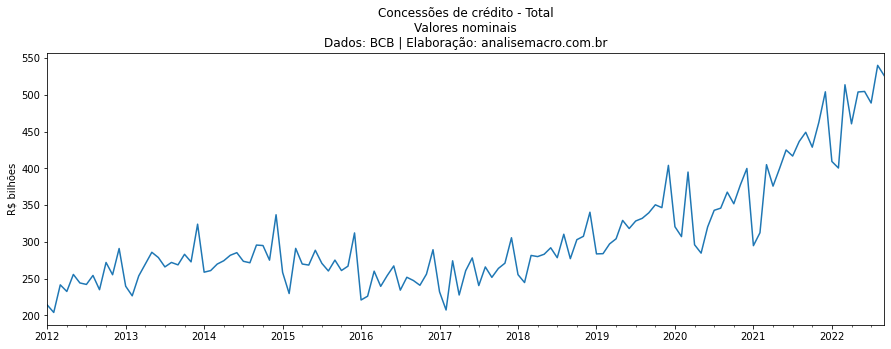

In [17]:
# Total - Nominal
(dados["Concessões de crédito - Total"] / 1000).plot(
    title = "Concessões de crédito - Total\nValores nominais\n" + fonte, 
    xlabel = "",
    ylabel = "R$ bilhões", 
    figsize = (15, 5)
    )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9df1d45a10>,
      dtype=object)

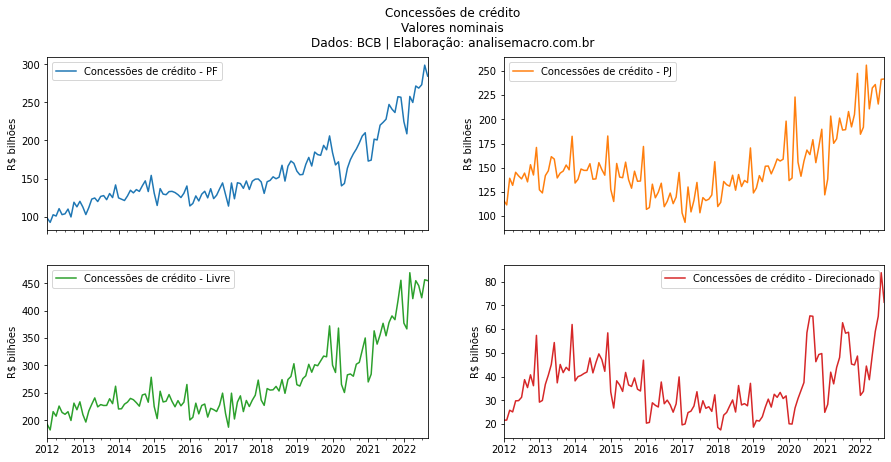

In [20]:
# PF/PJ e Livre/Direcionado - Nominal
(
    dados[["Concessões de crédito - PF", "Concessões de crédito - PJ",
           "Concessões de crédito - Livre", "Concessões de crédito - Direcionado"]] / 1000
 ).plot(
    title = "Concessões de crédito\nValores nominais\n" + fonte, 
    xlabel = "",
    ylabel = "R$ bilhões", 
    figsize = (15, 7),
    subplots = True,
    layout = (2, 2)
    )

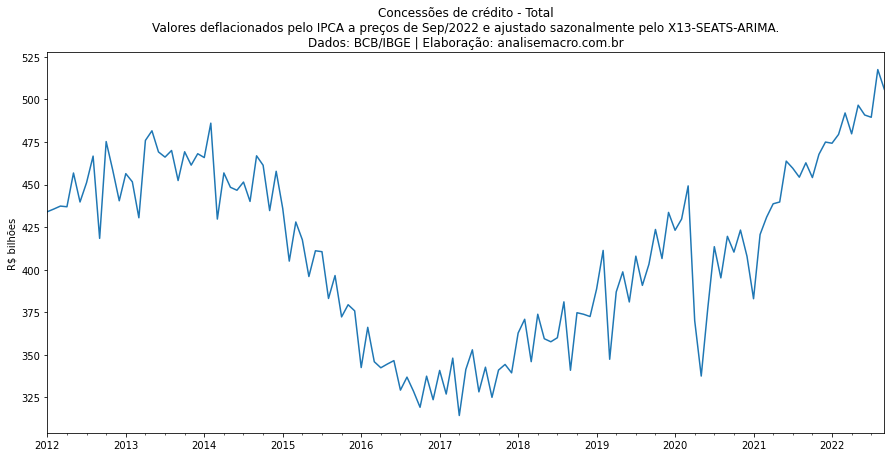

In [35]:
# Total - Deflacionado e dessazonalidado
os.environ["X13PATH"] = "/content/x13as/" # caminho do programa X13

concessoes = ( # tratamentos e cálculos
    pd.merge(
        left = dados["Concessões de crédito - Total"],
        right = ipca,
        on = "data"
        )
    .assign(
        deflacionado = lambda x: (x.ipca.iloc[-1] / x.ipca * x["Concessões de crédito - Total"]),
        ajuste = lambda x: x13.x13_arima_analysis(endog = x.deflacionado / 1000, prefer_x13 = True, freq = 12).seasadj
    )
)

concessoes.ajuste.plot( # gráfico
    title = "Concessões de crédito - Total\n" +
    "Valores deflacionados pelo IPCA a preços de " + 
    concessoes.tail(1).index.strftime("%b/%Y").item() + 
    " e ajustado sazonalmente pelo X13-SEATS-ARIMA." +
    "\nDados: BCB/IBGE | Elaboração: analisemacro.com.br",
    xlabel = "",
    ylabel = "R$ bilhões", 
    figsize = (15, 7)
    )

### Estoque

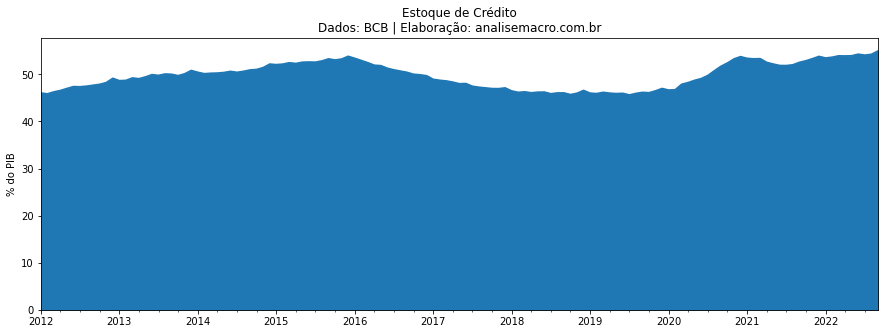

In [37]:
# Saldo % do PIB
(
    dados["Saldo da carteira de crédito - Total"] / dados["PIB acumulado dos últimos 12 meses"] * 100
 ).plot(
    title = "Estoque de Crédito\n" + fonte, 
    xlabel = "",
    ylabel = "% do PIB", 
    figsize = (15, 5),
    kind = "area"
    )

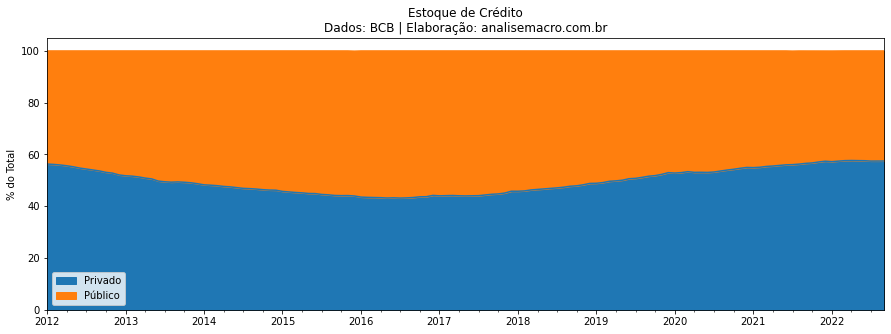

In [39]:
# Privado/Publico % do Total
(
    dados
    .assign(
        Privado = lambda x: x["Saldos de crédito - Privado"] / x["Saldo da carteira de crédito - Total"] * 100,
        Público = lambda x: x["Saldos de crédito - Público"] / x["Saldo da carteira de crédito - Total"] * 100
        )
    .filter(items = ["Privado", "Público"], axis = "columns")
    .plot(
        title = "Estoque de Crédito\n" + fonte, 
        xlabel = "",
        ylabel = "% do Total", 
        figsize = (15, 5),
        kind = "area"
        )
)

### Taxa de juros

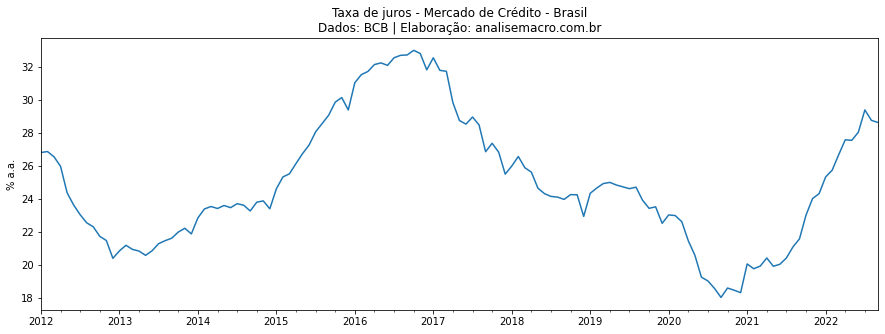

In [40]:
# Gráfico de linha
dados["Taxa média de juros das operações de crédito"].plot(
    title = "Taxa de juros - Mercado de Crédito - Brasil\n" + fonte, 
    xlabel = "",
    ylabel = "% a.a.", 
    figsize = (15, 5)
    )

### Spread

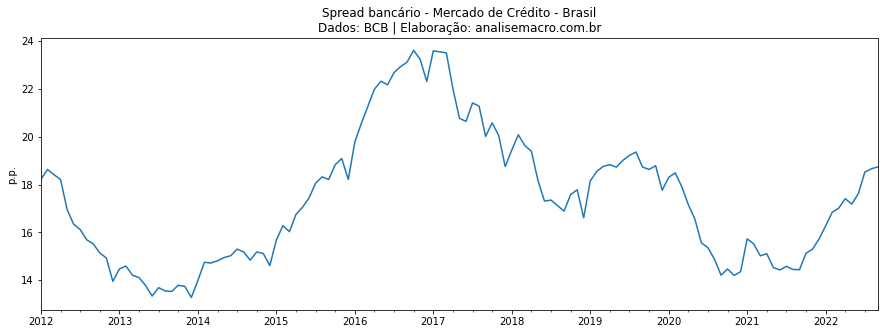

In [41]:
# Gráfico de linha
dados["Spread médio das operações de crédito"].plot(
    title = "Spread bancário - Mercado de Crédito - Brasil\n" + fonte, 
    xlabel = "",
    ylabel = "p.p.", 
    figsize = (15, 5)
    )

### Inadimplência

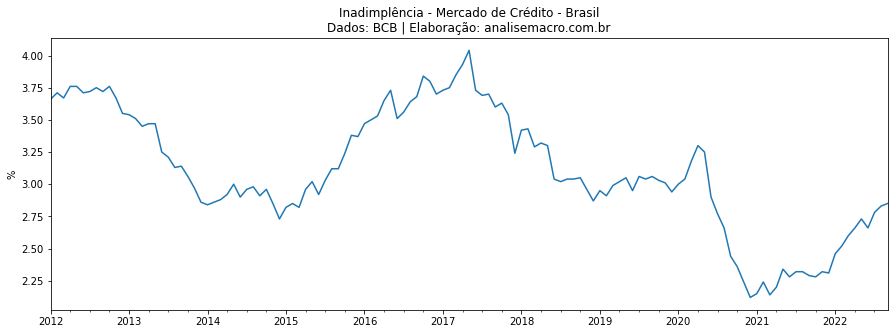

In [42]:
# Gráfico de linha
dados["Inadimplência da carteira de crédito"].plot(
    title = "Inadimplência - Mercado de Crédito - Brasil\n" + fonte, 
    xlabel = "",
    ylabel = "%", 
    figsize = (15, 5)
    )